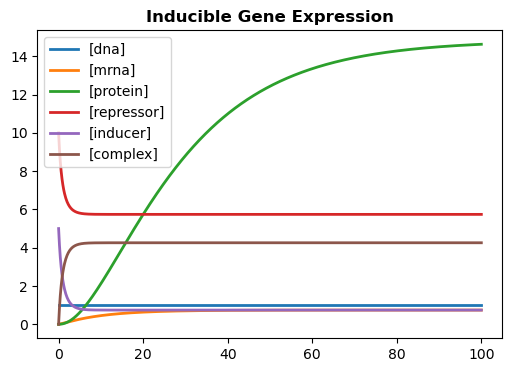

In [1]:
import tellurium as te
import matplotlib.pyplot as plt

model = te.loada("""
model inducible_gene_expression
// Species
species dna,mrna,protein,repressor,inducer,complex;
// Parameters
k_tx = 0.5; //transcription rate
k_tl = 1.0; //tranlation rate
k_deg_m = 0.1; //mrna degradation rate
k_deg_p = 0.05; //protein degradation rate
k_bind = 1.0; //repressor binding to dna
k_unbind = 0.1; //unbinding rate
k_on = 0.1; //inducer-repressor binding
k_off = 0.1; //complex dissociation
//Initial concentrations
dna=1;
mrna=0;
protein=0;
repressor=10;
inducer=5;
complex=0;
//Reactions
inducer + repressor -> complex; k_on*inducer*repressor;
complex -> inducer + repressor; k_off*complex;
//Transcrioption (repressed by free repressors)
J1: -> mrna; k_tx*dna/(1+repressor);
//Tranlation
J2: -> protein; k_tl*mrna;
//Degradation
J3: mrna -> ; k_deg_m*mrna;
J4: protein -> ; k_deg_p*protein;
end
""")
result = model.simulate(0, 100, 1000)
model.plot(result, title="Inducible Gene Expression", xtitle="Time", ytitle="Concentration")
